**جلسه اول : نمایش خوشه ای نرخ بازدهی بازار ارز دیجیتال بیت کوین**

***********************
توضیحات تمرین:
***********************
در این پروژه 10 کلاستر با 20 درصد داده تست و 80 درصد ترین و با امتیازه نزدیک به نه دهم خروجی گرفته شد.

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


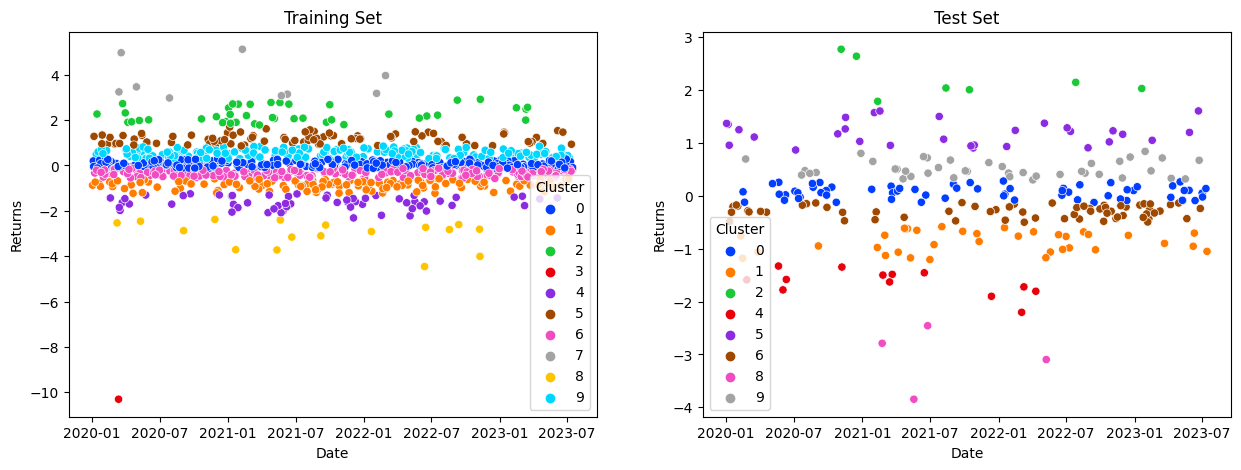

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[3 2 5 0 1 0 0 0 0 2 1 3 3 1 4 1 3 7 5 5 2 4 0 1 3 1 0 6 3 5 0 2 1 1 0 5 3
 5 5 1 0 4 2 3 2 1 3 5 1 1 1 2 1 3 1 2 1 1 5 5 2 2 6 5 1 5 0 0 0 1 0 0 5 2
 3 2 5 3 1 5 5 3 1 4 5 1 5 5 5 5 0 0 2 4 2 0 3 0 5 3 0 1 0 1 1 0 2 0 5 2 0
 3 2 0 2 3 0 1 0 0 1 1 1 0 2 1 7 2 5 1 1 2 0 1 1 2 0 0 3 0 2 4 2 0 1 3 3 1
 0 0 6 2 1 3 2 4 3 5 0 5 5 2 0 1 1 6 3 0 5 0 3 0 0 1 5 1 3 2 1 3 0 7 1 1 3
 0 4 1 1 5 0 1 2 1 1 2 0 5 4 2 5 2 1 4 0 2 0 1 5 6 0 0 0 6 3 2 2 4 0 0 2 3
 4 1 1 1 2 0 0 5 6 1 0 0 7 1 2 0 2 0 2 0 1 1 1 3 0 4 1 0 0 1 2 1 0 5 1 0 5]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.6918780826009617, 0.7200107548921995, 0.7142285068520485, 0.7496754510308389, 0.8024756020255132, 0.8437097918118551, 0.8768300074359432, 0.8931986943541669]


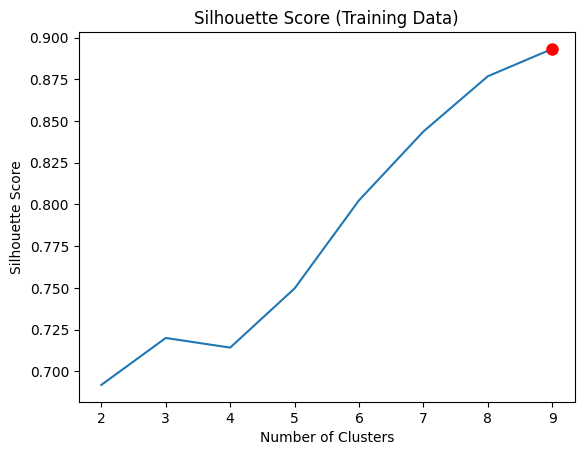

In [20]:
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "BTC-USD"
start_date = "2020-01-01"
end_date = "2023-07-19"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

#Return_Daily=V_(today-V_yesterday )/V_yesterday *100

# Calculate the daily returns
df['Returns'] = df['Close'].pct_change()

# Drop the first row (which has a NaN value)
df = df.dropna()

# Preprocess the data
X = df[['Returns']]
X = (X - X.mean()) / X.std()  # Standardize the data

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

# Perform KMeans clustering on the training set
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
X_train['Cluster'] = kmeans.labels_

# Apply the clustering to the test set
X_test['Cluster'] = kmeans.predict(X_test)

# Plot the clusters on the training and test sets
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.scatterplot(data=X_train, x=X_train.index, y='Returns', hue='Cluster', palette='bright', ax=axs[0])
sns.scatterplot(data=X_test, x=X_test.index, y='Returns', hue='Cluster', palette='bright', ax=axs[1])
axs[0].set(title='Training Set')
axs[1].set(title='Test Set')
plt.show()



# Evaluate the performance of KMeans on the training set using Silhouette

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def find_best_n_clusters(X):
    silhouette_scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return best_n_clusters

# Find the best number of clusters for training data
best_n_clusters_train = find_best_n_clusters(X_train)

# Fit KMeans with the best number of clusters for training data
kmeans_train = KMeans(n_clusters=best_n_clusters_train)
kmeans_train.fit(X_train)

# Find the best number of clusters for test data
best_n_clusters_test = find_best_n_clusters(X_test)

# Fit KMeans with the best number of clusters for test data
kmeans_test = KMeans(n_clusters=best_n_clusters_test)
kmeans_test.fit(X_test)

# Get the labels for test data
test_cluster_labels = kmeans_test.labels_
test_label=print(test_cluster_labels)

# Plot the evaluation metrics for training data
silhouette_scores_train = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    silhouette_scores_train.append(silhouette_score(X_train, kmeans.labels_))


scores=print(silhouette_scores_train)

sns.lineplot(x=range(2, 10), y=silhouette_scores_train)
plt.plot(best_n_clusters_train, silhouette_scores_train[best_n_clusters_train-2], 'ro', markersize=8)
plt.title('Silhouette Score (Training Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

